# Neural Networks

- More neurons (linear regressors)
- Features are the different inputs to the network
- Goal: Find the correlation between those features
- Optimization: Gradient Descent
- Learning: Backpropagation
- Weight Initialization:
    - Zeros: All the same computations - no learning
    - Xavier :-)

## Fashion-MNIST Project with FFNs

- 10 categories (t-shirt, pullover, dress, bag, ...)
- Each image is 28x28 pixels


Network:
- Input: (784,1)
- Hidden-Layer: e.g. 100 neurons
- Output-Layer: 1 neuron

### Helpers

In [2]:
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)

In [4]:
X_train = open_images("./data/fashion/train-images-idx3-ubyte.gz")

In [5]:
X_train.shape

(60000, 28, 28)

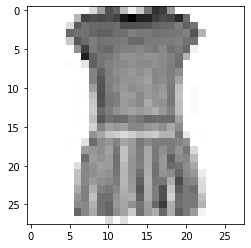

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[3], cmap="gray_r")
plt.show()

In [8]:
# Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist
y_train = open_labels("./data/fashion/train-labels-idx1-ubyte.gz")

In [11]:
y_train[3]

3

## Model Creation (KERAS)

- Classification: Is it a t-shirt or not?

In [35]:
X_train = open_images("./data/fashion/train-images-idx3-ubyte.gz")

In [36]:
# Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist
y_train = open_labels("./data/fashion/train-labels-idx1-ubyte.gz")

In [37]:
y_train = y_train == 0

In [38]:
y_train

array([False,  True,  True, ..., False,  True, False])

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
model = Sequential()
model.add(Dense(units=100, activation="sigmoid",input_shape=(784,)))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [40]:
X_train.shape # 784!

(60000, 28, 28)

In [41]:
X = X_train.reshape(-1, 28*28)

In [42]:
X.shape

(60000, 784)

In [43]:
model.fit(X, y_train, epochs=50, batch_size=1000)

Epoch 1/50
60000/60000 [==============================] - 0s 6us/step - loss: 0.2925 - accuracy: 0.8845
Epoch 2/50
60000/60000 [==============================] - 0s 6us/step - loss: 0.1975 - accuracy: 0.9118
Epoch 3/50
60000/60000 [==============================] - 0s 6us/step - loss: 0.1695 - accuracy: 0.9385
Epoch 4/50
60000/60000 [==============================] - 0s 6us/step - loss: 0.1534 - accuracy: 0.9470
Epoch 5/50
60000/60000 [==============================] - 0s 5us/step - loss: 0.1426 - accuracy: 0.9511
Epoch 6/50
60000/60000 [==============================] - 0s 6us/step - loss: 0.1360 - accuracy: 0.9527
Epoch 7/50
60000/60000 [==============================] - 0s 6us/step - loss: 0.1312 - accuracy: 0.9534
Epoch 8/50
60000/60000 [==============================] - 0s 6us/step - loss: 0.1274 - accuracy: 0.9541
Epoch 9/50
60000/60000 [==============================] - 0s 6us/step - loss: 0.1243 - accuracy: 0.9549
Epoch 10/50
60000/60000 [==============================] - 0s 6u

In [44]:
model.evaluate(X, y_train)

60000/60000 [==============================] - 1s 13us/step


[0.09376456985796491, 0.9617999792098999]

In [45]:
print(model.metrics_names)

['loss', 'accuracy']


## Metrics computation

In [46]:
y_train_pred = model.predict(X)

In [47]:
import numpy as np

In [54]:
np.mean(np.round(y_train_pred).reshape(-1) == y_train)

0.9618

## Train/Test in Keras

In [55]:
X_train = open_images("./data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("./data/fashion/train-labels-idx1-ubyte.gz")

y_train = y_train == 0

X_test = open_images("./data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("./data/fashion/t10k-labels-idx1-ubyte.gz")

y_test = y_test == 0

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [58]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.2384 - accuracy: 0.9096
Epoch 2/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.1680 - accuracy: 0.9380
Epoch 3/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.1482 - accuracy: 0.9467
Epoch 4/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.1376 - accuracy: 0.9504
Epoch 5/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.1310 - accuracy: 0.9523
Epoch 6/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.1262 - accuracy: 0.9534
Epoch 7/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.1229 - accuracy: 0.9537
Epoch 8/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.1200 - accuracy: 0.9545
Epoch 9/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.1180 - accuracy: 0.9546
Epoch 10/10
60000/60000 [==============================] - 0s 6u

In [59]:
model.evaluate(X_test.reshape(-1, 784), y_test)

10000/10000 [==============================] - 0s 18us/step


[0.12036667124032974, 0.9537000060081482]